MAXIMUM ACCURACY: 0.8989777390924101
coefficeint :
 [ 0.17450327  0.96362083  0.03474712 -0.30692955 -0.25903256]
intercept
 -1.4424249422739592
17.61113731593355 [16 17  4  0  1] 18
8.720071981842647 [11  9 10  0  3] 10
14.097200692968121 [15 14  6  0  3] 14
12.113964536796999 [12 12 12  0  2] 11
6.865732589566971 [9 8 6 3 1] 10
11.241435206176627 [12 11 16  1  1] 12
6.72991128624478 [7 8 8 0 4] 8
5.0130375443358135 [ 6  6 13  1  2] 8
7.40353524732943 [8 8 0 0 1] 11
9.071744343954835 [ 8 10  0  0  2] 12
9.81877192606875 [10 10  4  0  1] 10
8.247112007370877 [8 9 4 0 2] 10
15.339566155204924 [16 15  9  0  3] 16
13.853203181650985 [14 14  4  0  3] 14
-0.9134704677361132 [6 0 0 0 2] 0
13.477141718292026 [14 13  6  0  1] 13
10.318786832733771 [11 11  8  0  4] 10
15.885453857604606 [15 16  2  0  3] 18
11.86996702547986 [11 12 10  0  2] 13
9.24393165309015 [11  9 19  1  1] 10
15.180865589031725 [15 15  2  0  2] 16
3.2428775714579867 [6 5 0 3 1] 0
8.98721505005805 [ 9 10  0  0  3] 0
10.81790

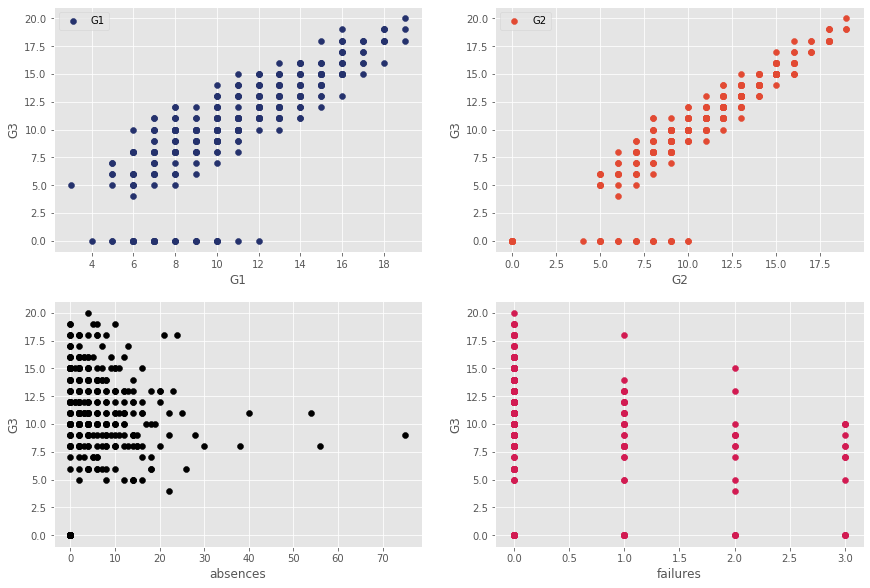

In [83]:
import pandas as pd
import numpy as np
import sklearn
import pickle
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib import style





style.use("ggplot")

data=pd.read_csv("a.csv",sep=";")
data=data[["G1","G2", "absences","failures", "studytime","G3"]]
data=shuffle(data)
X=np.array(data.drop(["G3"],1))
Y=np.array(data["G3"])


best=0
for x in range(10):
    X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.15)

    linear=linear_model.LinearRegression()
    linear.fit(X_train,Y_train)
    acc=linear.score(X_test,Y_test)
    
    if acc>best:
        best=acc
        with open("student.pickle","wb") as f:
            pickle.dump(linear,f)


pickle_in=open("student.pickle","rb")
linear=pickle.load(pickle_in)

print("MAXIMUM ACCURACY:",best)

print("coefficeint :\n", linear.coef_)
print("intercept\n", linear.intercept_)

prediction=linear.predict(X_test)

for x in range(len(prediction)):
    print(prediction[x],X_test[x],Y_test[x])

    
    
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
plt.scatter(data["G1"],data["G3"],label="G1",color="#25326D")
plt.legend()
plt.xlabel("G1")
plt.ylabel("G3")

ax2=fig.add_subplot(2,2,2)
plt.scatter(data["G2"],data["G3"],label="G2")
plt.legend()
plt.xlabel("G2")
plt.ylabel("G3")

ax3=fig.add_subplot(2,2,3)
plt.scatter(data["absences"],data["G3"],label='absences',color="k")
plt.xlabel("absences")
plt.ylabel("G3")

ax4=fig.add_subplot(2,2,4)
plt.scatter(data["failures"],data["G3"],label="failures",color="#d21b52")
plt.xlabel('failures')
plt.ylabel("G3")

plt.subplots_adjust(right=2,top=2)







